# HW1_2
1. จงเขียนโค้ดเพื่อให้ได้ผลลัพธ์ดังภาพ

```
tensor([[1., 2., 3., 4.],
        [2., 3., 4., 5.],
        [3., 4., 5., 6.],
        [4., 5., 6., 7.]])
```
โดยเริ่มต้นจาก
 tensor = torch.ones(4, 4)



In [ ]:
# 1

import numpy as np
import torch

tensor = torch.ones( 4,4 )

# loop every row and column and increament cnt from row number in every col changed
for row in range(4):
	cnt = row + 1
	for col in range( 4 ):
		tensor[ row, col ] = cnt
		cnt += 1

tensor

tensor([[1., 2., 3., 4.],
        [2., 3., 4., 5.],
        [3., 4., 5., 6.],
        [4., 5., 6., 7.]])


2. จงเขียนโค้ดเพื่อให้ได้ผลลัพธ์ดังภาพ

```
tensor([[1., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 4., 0.],
        [0., 0., 0., 0., 5.]])
```
โดยเริ่มต้นจาก
tensor = torch.zeros(5, 5)



In [ ]:
tensor = torch.zeros(5, 5)

for row in range( 5 ):
	cnt = row + 1
	# set value to row number when row and col is match
	tensor[ row, row ] = cnt

tensor

tensor([[1., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 4., 0.],
        [0., 0., 0., 0., 5.]])


3. จงเขียนโค้ดเพื่อให้ได้ผลลัพธ์ดังภาพ

```
tensor([[ 1.,  2.,  3.,  4.,  5.],
        [16., 17., 18., 19.,  6.],
        [15., 24., 25., 20.,  7.],
        [14., 23., 22., 21.,  8.],
        [13., 12., 11., 10.,  9.]])

```
โดยเริ่มต้นจาก
tensor = torch.zeros(5, 5)
* ใช้ loop ซ้อนกันเกิน 2 ชั้น

In [14]:
tensor = torch.zeros(5, 5)
num = 1

# 3 nested loops: layer -> side -> position
for layer in range(3):                    # Loop 1: spiral layers (0, 1, 2)
    for side in range(4):                 # Loop 2: sides (top, right, bottom, left)
        # Calculate boundaries for current layer
        top, bottom = layer, 4 - layer
        left, right = layer, 4 - layer
        
        if side == 0:  # Top side
            for pos in range(left, right + 1):     # Loop 3: positions
                if tensor[top][pos] == 0:  # Only fill if empty
                    tensor[top][pos] = num
                    num += 1
        elif side == 1:  # Right side  
            for pos in range(top + 1, bottom + 1): # Loop 3: positions
                if tensor[pos][right] == 0:
                    tensor[pos][right] = num
                    num += 1
        elif side == 2:  # Bottom side
            for pos in range(right - 1, left - 1, -1): # Loop 3: positions
                if tensor[bottom][pos] == 0:
                    tensor[bottom][pos] = num
                    num += 1
        elif side == 3:  # Left side
            for pos in range(bottom - 1, top, -1):     # Loop 3: positions
                if tensor[pos][left] == 0:
                    tensor[pos][left] = num
                    num += 1

print(tensor)

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [16., 17., 18., 19.,  6.],
        [15., 24., 25., 20.,  7.],
        [14., 23., 22., 21.,  8.],
        [13., 12., 11., 10.,  9.]])


4. จงทำการขยายเทนเซอร์ที่มิติ 0 สลับเทนเซอร์ระหว่างมิติที่ 0 กับ 1 เชื่อมเทนเซอร์แบบเดิมที่มิติที่ 2 และการทำการคลี่ออกในตอนสุดท้าย ผลลัพธ์สุดท้ายและรูปทรงสุดท้ายเป็นอย่างไร?
```
Unsqueeze (dim=0) --> Permute[dim=0<-->dim=1] --> Concatenate (dim=2) --> Flatten
```
เทนเซอร์โจทย์
\
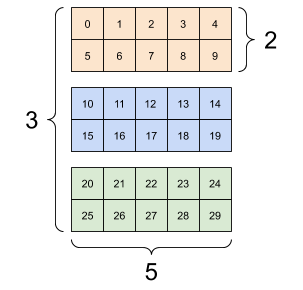

In [ ]:
import torch

# init started tensor
tensor = torch.tensor([
    [[0, 1, 2, 3, 4],
     [5, 6, 7, 8, 9]],
    
    [[10, 11, 12, 13, 14],
     [15, 16, 17, 18, 19]],
    
    [[20, 21, 22, 23, 24],
     [25, 26, 27, 28, 29]]
])
# step1
tensor = tensor.unsqueeze(dim=0)
# step2
tensor = tensor.permute(1, 0, 2, 3)
# step 3
tensor = torch.cat([tensor, tensor], dim=2)
# step 4
tensor = tensor.flatten()

# display tensor value and its shape
print( tensor )
print( tensor.shape )

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  0,  1,  2,  3,  4,  5,  6,  7,
         8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 20, 21, 22, 23,
        24, 25, 26, 27, 28, 29])
torch.Size([60])
